d:\Assignment\myenv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1
d:\Assignment\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


query route Loaded.


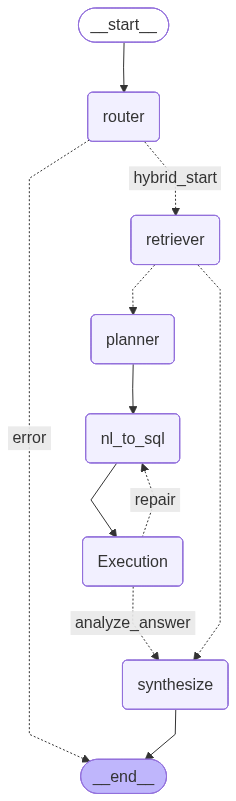

In [1]:
# Notebook me graph inline visualize karne ke liye
import sys
import os

# Add parent folder dynamically
sys.path.append(os.path.abspath("..")) 
from IPython.display import display, Markdown

from graph_hybrid import app , Agent_State
import json
import dspy# aapka compiled LangGraph app
app 

In [2]:
def test_agent_query(query: str, format_hint: str):
    """
    Agent ko run karta hai aur tafseelat (details) print karta hai.
    """
    
    print("-" * 50)
    display(Markdown(f"### 🔎 Testing Query: **{query}**"))

    initial_state = Agent_State(
        query=query, 
        format_hint=format_hint, 
        route="", 
        context=[], 
        sql_query="", 
        sql_result="", 
        sql_error="", 
        iteration=0, 
        confidence=0.0
    )
    
    try:
        final_state = app.invoke(initial_state)

        route_chosen = final_state.get('route', 'N/A')
        sql_attempt = final_state.get('sql_query', '')
        
        # --- Flow Status Determination ---
        if final_state.get('sql_error'):
            flow_status = f"❌ FAILED! SQL Error: {final_state['sql_error'][:60]}..."
        elif not sql_attempt and route_chosen == 'rag':
            flow_status = "✅ SUCCESS! SQL/Execution SKIPPED (RAG-Only)."
        elif sql_attempt and not final_state.get('sql_error'):
            flow_status = "✅ SUCCESS! SQL Attempted & Executed."
        else:
            flow_status = "⚠️ UNKNOWN FLOW"
        
        # --- Final Output ---
        
        display(Markdown(f"**[1] Route Chosen:** `{route_chosen.upper()}`"))
        display(Markdown(f"**[2] Flow Status:** {flow_status}"))
        display(Markdown(f"**[3] Final Answer:** `{final_state.get('final_answer', 'N/A')}`"))
        display(Markdown(f"**[4] SQL Query (if any):** \n```sql\n{sql_attempt}\n```"))
        display(Markdown(f"**[5] Citations:** `{final_state.get('citations')}`"))
        
        print("\n--- Raw State ---")
        print(json.dumps(final_state, indent=2))
        
    except Exception as e:
        display(Markdown(f"**[CRITICAL ERROR RUNNING GRAPH]:** `{e}`"))

In [3]:
test_agent_query(
    query="Using the AOV definition from the KPI docs, what was the Average Order Value during 'Winter Classics 1997'?",
    format_hint="float"
)

--------------------------------------------------


### 🔎 Testing Query: **Using the AOV definition from the KPI docs, what was the Average Order Value during 'Winter Classics 1997'?**

**[CRITICAL ERROR RUNNING GRAPH]:** `litellm.APIConnectionError: OllamaException - litellm.Timeout: Connection timed out after 600.0 seconds.`